<a href="https://colab.research.google.com/github/andreianmatos/temporal_spaces_texture_gen/blob/main/results_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from io import BytesIO
from zipfile import ZipFile
import requests
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from urllib.parse import urlparse
from PIL import Image

In [17]:
original_dataset_link = 'https://github.com/andreianmatos/temporal_spaces_texture_gen/raw/main/datasets/all_members_64.zip'
styleGAN_ema_link = 'https://github.com/andreianmatos/temporal_spaces_texture_gen/raw/main/results/styleGAN/styleGAN_ema.zip'
styleGAN_mr_link = 'https://github.com/andreianmatos/temporal_spaces_texture_gen/raw/main/results/styleGAN/styleGAN_mr.zip'
styleGAN_standard_link = 'https://github.com/andreianmatos/temporal_spaces_texture_gen/raw/main/results/styleGAN/styleGAN_standard.zip'
DCGAN_link = 'https://github.com/andreianmatos/temporal_spaces_texture_gen/raw/main/results/DCGAN/DCGAN.zip'
CVAE_link = 'https://github.com/andreianmatos/temporal_spaces_texture_gen/raw/main/results/CVAE/CVAE.zip'

dataset_links = [styleGAN_ema_link, styleGAN_mr_link, styleGAN_standard_link, DCGAN_link, CVAE_link, original_dataset_link]

In [28]:
datasets_folder = 'datasets'

def fetch_and_extract_dataset(link, folder_name):
    response = requests.get(link)
    zip_data = BytesIO(response.content)

    with ZipFile(zip_data, 'r') as zip_ref:
        zip_ref.extractall(folder_name)

# Loop through each dataset link and fetch/extract
for index, link in enumerate(dataset_links):
    dataset_name = f'{index}_'+ urlparse(link).path.split('/')[-1].split('.')[0]
    dataset_path = os.path.join(datasets_folder, dataset_name)

    os.makedirs(dataset_path, exist_ok=True)
    fetch_and_extract_dataset(link, dataset_path)

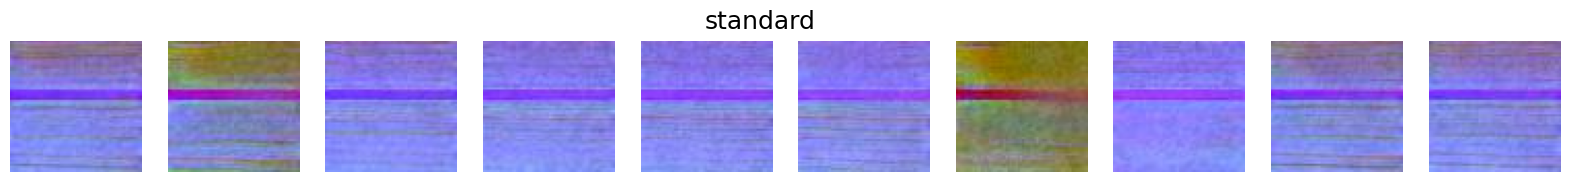

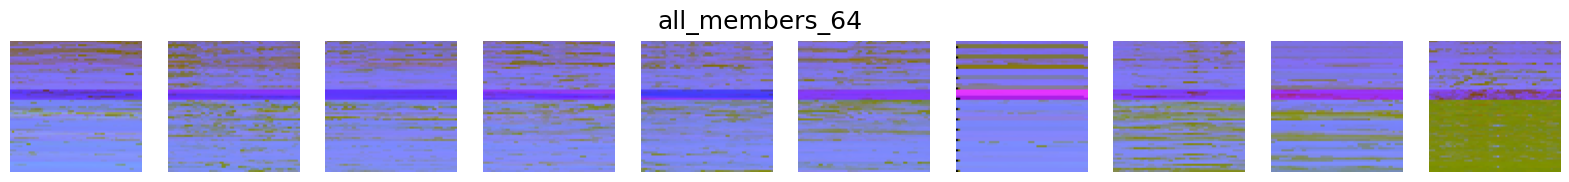

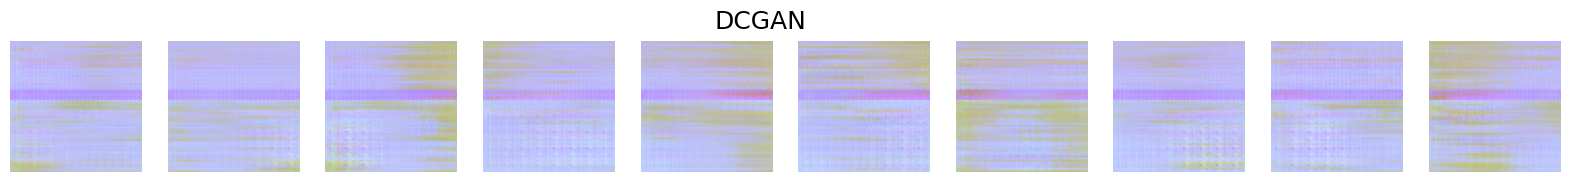

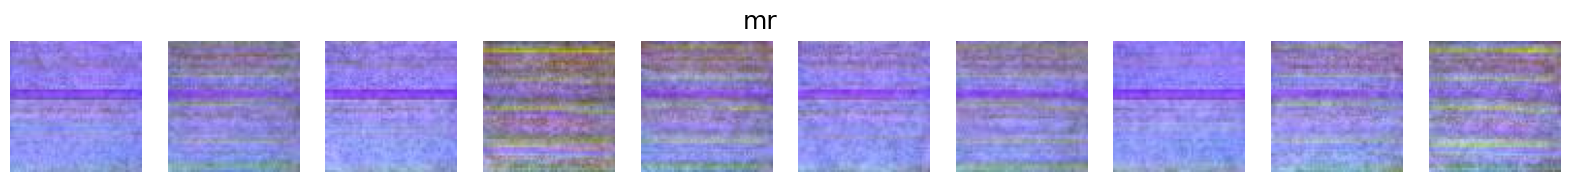

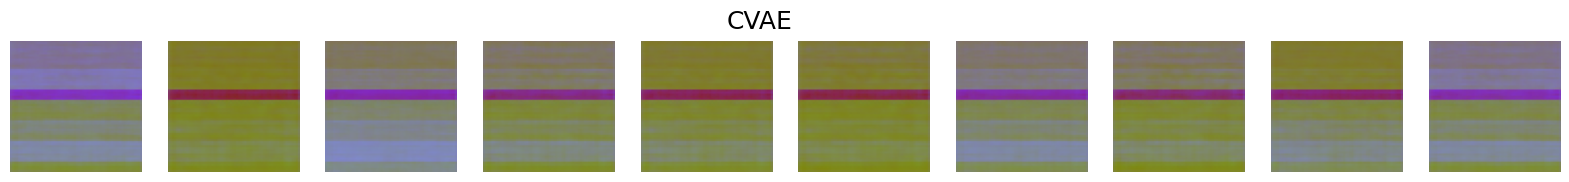

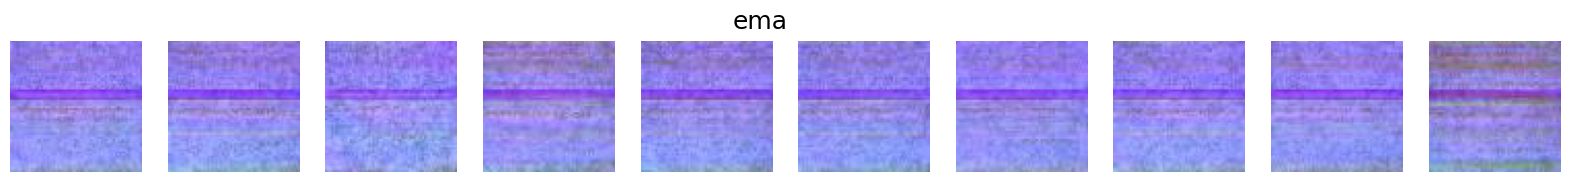

In [44]:
def display_images_in_row(images, dataset_name):
    if not images:
        return

    fig, axs = plt.subplots(1, min(10, len(images)), figsize=(20, 2))
    fig.suptitle(f'{dataset_name}', fontsize=18)

    for i, image in enumerate(images[:10]):
        axs[i].imshow(image)
        axs[i].axis('off')
    plt.show()

def display_image(image_path):
    image = Image.open(image_path)
    width, height = image.size
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

for root, dirs, files in os.walk(datasets_folder):
    for dir_name in dirs:
        folder_path = os.path.join(root, dir_name)

        image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.lower().endswith(('.jpg', '.jpeg', '.png'))]
        images = [Image.open(image_path) for image_path in image_files]

        display_images_in_row(images, dir_name)

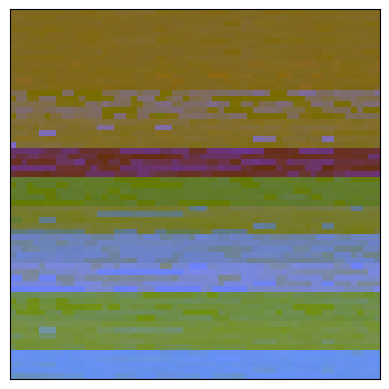

In [45]:
# Original Training Dataset Example
image_path = '/content/datasets/5_all_members_64/all_members_64/capture3.png'
display_image(image_path)

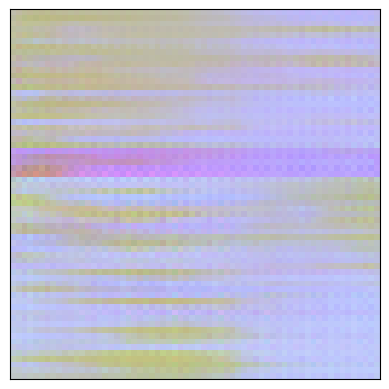

In [50]:
# DCGAN example
image_path = '/content/datasets/3_DCGAN/DCGAN/image_7.png'
display_image(image_path)

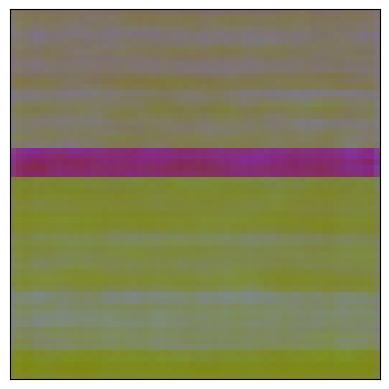

In [56]:
# CVAE example
image_path = '/content/datasets/4_CVAE/CVAE/image_4.png'
display_image(image_path)

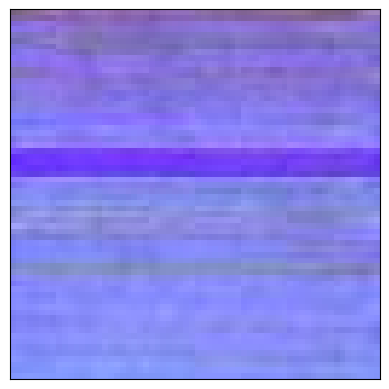

In [51]:
# StyleGAN (std) example
image_path = '/content/datasets/2_styleGAN_standard/standard/generated-01-25-2024_16-37-15.jpg'
display_image(image_path)